In [49]:
from nltk import word_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NightMare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NightMare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
sentence = """Доброго времени.
Я прохожу обучение в онлайн школе Geekbrains на курсе «Программист разработчик» с получением в будущем специализации «Сетевой инженер». Хочу поделиться своими впечатлениями о курсе и организации учебного процесса.
У меня есть высшее образование по направлению — педагогика. И я не по наслышке знаю, как не просто организовать учебный процесс, тем более дистанционный.
Прежде всего, стоит отметить, что учёба в онлайн формате предполагает не только следование программе курса /а она построена хорошо/, но и значительную самостоятельную работу. Никто не отменял необходимость изучения дополнительных материалов и глубокого погружения в тему. Это очень важно для полноценного освоения профессии и умения решать практические задачи.
Особо хочется выразить благодарность нашему преподавателю, Ильнару Шафигуллину. Его профессионализм, глубокие знания предмета и умение доступно объяснять сложные вопросы делают процесс обучения максимально эффективным и интересным. Ильнар всегда готов помочь и ответить на вопросы, что делает обучение особенно ценным. Поверьте мне — хорошее преподование дано не многим, это Дар Божий. Ильнар один тех, кому повезло найти своё призвание и настоящее место в жизни, спасибо Вам.
Не могу не отметить также качество технической поддержки и помощь в телеграмм-канале группы. Техподдержка отзывчива и оперативно решает любые возникающие вопросы, что существенно упрощает процесс обучения и позволяет сконцентрироваться на изучении материала. Иногда запаздывает поддержка наставников, но всегда должно быть что-то, что нужно улучшить, это процесс.
В целом, обучение в Geekbrains оставляет очень положительные впечатления. Курс организован профессионально, а обучение дополняется необходимой поддержкой как со стороны преподавателей, так и технической службы. Это отличный выбор для тех, кто хочет погрузиться в мир IT и приобрести необходимые для карьеры навыки.
Надо помнить — путь в IT связан с пожизненым, постоянным профессиональным ростом, учиться будете всегда! Обучаюсь на годовом курсе интернет-маркетинга в Geek Brains. Еще не успела закончить обучение, а уже работаю по профессии в крупном онлайн-институте в отделе маркетинга. Сам факт обучения уже стал путевкой в профессию, это здорово)
Нравится возможность брать собственные проекты, реальные кейсы при выполнении домашних заданий. Преподаватели интересные, лояльные (хотелось бы больше детальной проработки ошибок, указаний на них)
Формат обучения удобный.
Все нравится, кроме:
— работа техподдержки оставляет желать лучшего, не отвечают подолгу (от нескольких дней до недели)
— возможно я невнимательно вчитывалась в договор, но практически к концу обучения выяснилось, что заморозки обучения, которые я брала, возможны максимум на 6 месяцев (суммарно), иначе нет шанса получить документ о получении образования. Никто из поддержки Geek Brains ранее не проинформировал, и узнала я по факту. Для меня это большой минус, так как жизненные обстоятельства бывают очень разными.
Очень интересные лекции, классная подача материала, хорошие презентации и дополнительные ресурсы, ссылки. Да, вода тоже есть. Но все зависит от студента, на что он будет заострять внимание, и что впитывать.", "Пришла в профессию с 0. Прошла курс didgital маркетинг, сейчас заканчиваю курс по контекстной рекламе. Очень грамотно выстроена структура обучения. Шаг за шагом, от легкого к сложному. Уроки проходят в режме реального времени и так же все уроки доступны в записи. Со стороны преподавателей большое внимание к подаче материала, всегда отвечают на уточняющие вопросы. На базе платформы возможно общение с преподавателем в личных сообщениях. По выполненным ДЗ дают рекомендации."""

In [54]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

def freq_word(sentence):
    sentence = remove_punctuation(sentence)
    spec_chars = string.punctuation + '\n\xa0«»\t—…'
    sentence = "".join([ch for ch in sentence if ch not in spec_chars])
    sentence = remove_chars_from_text(sentence, spec_chars)
    sentence = remove_chars_from_text(sentence, string.digits)
    text_tokens = word_tokenize(sentence)
    sentence = nltk.Text(text_tokens)
    russian_stopwords = stopwords.words("russian")
    russian_stopwords.extend(['это', 'нею', 'в'])
    fdist = FreqDist(sentence)
    text_raw = " ".join(sentence)
    wordcloud = WordCloud(stopwords=set(russian_stopwords)).generate(text_raw)
    return wordcloud

(-0.5, 399.5, 199.5, -0.5)

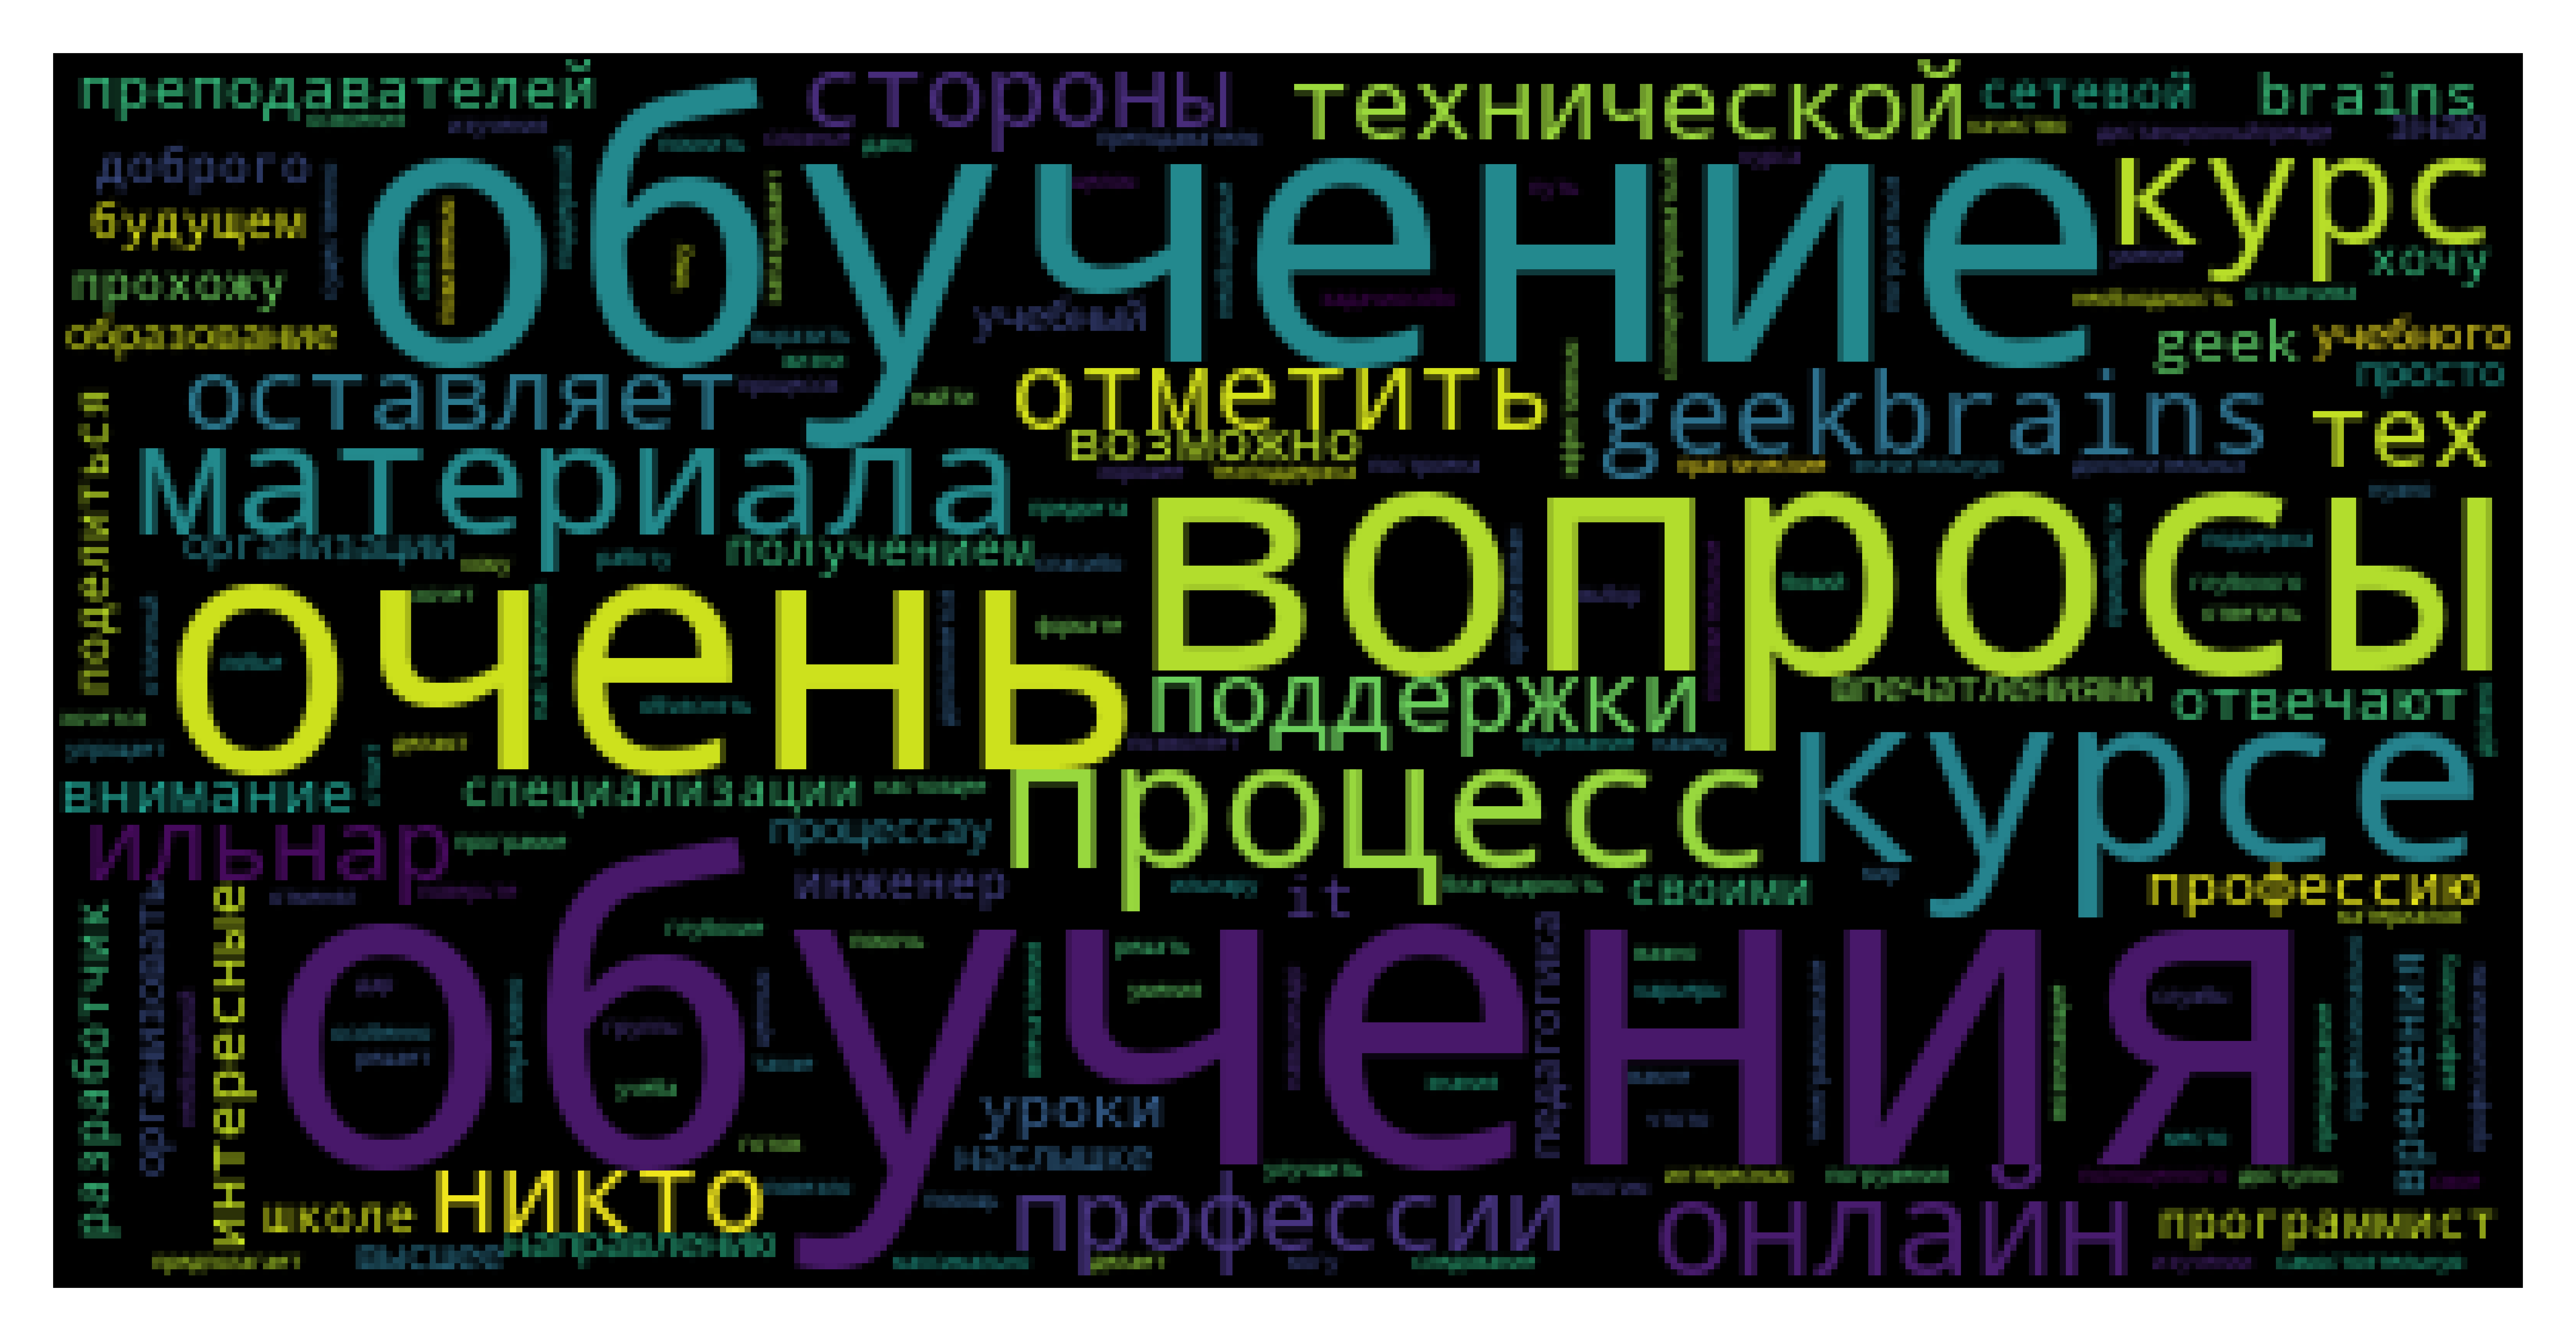

In [60]:
cloud = freq_word(sentence)
plt.figure(figsize=(6, 6), dpi=2000) 
plt.imshow(cloud)
plt.axis("off")